## Task 1 : Ascending the Gradient Descent

#### Importing the libraries

In [22]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

#### Generating the dataset

In [3]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

#### Q1 Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form $\theta_1x + \theta_0$) for any given values of ($\theta_1,\theta_0$)

In [4]:
# Initialize t0 and t1
t0=torch.tensor(1.0, requires_grad=True)
t1=torch.tensor(2.0, requires_grad=True)

# Compute loss
loss=0
for i in range(num_samples):
    yp= t0 + t1*x1[i]
    loss += (y[i]-yp)**2
loss=loss/num_samples

# Compute gradients
loss.backward()

# Print gradients
print(f"Gradient with respect to t0: {t0.grad.item()}")
print(f"Gradient with respect to t1: {t1.grad.item()}")

Gradient with respect to t0: -5.785816192626953
Gradient with respect to t1: 0.06868766248226166


#### Q2 Using the same ($\theta_1,\theta_0$) as above, calculate the stochastic gradient for all points in the dataset. Then, find the average of all those gradients and show that the stochastic gradient is a good estimate of the true gradient.

In [5]:
l=0.0

# Compute gradients for all samples
t0_grad=[]
t1_grad=[]
for i in range(num_samples):
    yp= t0 + t1*x1[i]
    l= (y[i]-yp)**2
    t0.grad.zero_()
    t1.grad.zero_()  
    l.backward()
    t0_grad.append(t0.grad.item())
    t1_grad.append(t1.grad.item())

# Print average gradients
print(f"Gradient with respect to t0: {np.mean(t0_grad)}")
print(f"Gradient with respect to t1: {np.mean(t1_grad)}")

Gradient with respect to t0: -5.7858156859874725
Gradient with respect to t1: 0.06868768092244863


#### Q3 Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of ϵ (or ϵ-neighborhood) from the minimum value of the loss function.Visualize the convergence process for 15 epochs. Choose ϵ=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

##### Finding minimum loss from normal equation

In [6]:
from numpy.linalg import inv

x0=np.ones(num_samples)
X=np.hstack((x0.reshape(num_samples,1),x1.reshape(num_samples,1)))
print(X.shape)

T=inv(X.T@X)@X.T@y

print("Theta matrix: ",end="")
print(T)

min_t0=T[0]
min_t1=T[1]

min_loss=0
for i in range(num_samples):
    yp= min_t0 + min_t1*x1[i]
    min_loss += (y[i]-yp)**2
min_loss=min_loss/num_samples

print(f"Min Loss: {min_loss}")

(40, 2)
Theta matrix: [3.9507064  2.68246893]
Min Loss: 0.5957541565733318


##### Full-batch gradient descent

Epoch: 40, Loss: 2.901075839996338
Epoch: 80, Loss: 1.3707449436187744
Epoch: 120, Loss: 0.9459856748580933
Epoch: 160, Loss: 0.7859480381011963
Epoch: 200, Loss: 0.7074881792068481
Epoch: 240, Loss: 0.663256049156189
Epoch: 280, Loss: 0.6369132399559021
Epoch: 320, Loss: 0.6209258437156677
Epoch: 360, Loss: 0.6111630797386169
Epoch: 400, Loss: 0.6051896810531616
Epoch: 440, Loss: 0.6015326380729675
Epoch: 480, Loss: 0.5992928743362427
Epoch: 520, Loss: 0.5979212522506714
Epoch: 560, Loss: 0.5970814228057861
Epoch: 600, Loss: 0.5965670347213745
Epoch: 640, Loss: 0.5962520837783813
Epoch: 680, Loss: 0.5960590243339539
Epoch: 720, Loss: 0.595940887928009
Epoch: 760, Loss: 0.5958684086799622
Epoch: 800, Loss: 0.5958242416381836
Epoch: 840, Loss: 0.595797061920166
Epoch: 880, Loss: 0.5957804322242737
Epoch: 920, Loss: 0.5957702398300171
Epoch: 960, Loss: 0.5957640409469604
Epoch: 1000, Loss: 0.5957602262496948

Final values of t0:3.95017147064209 and t1:2.678084135055542


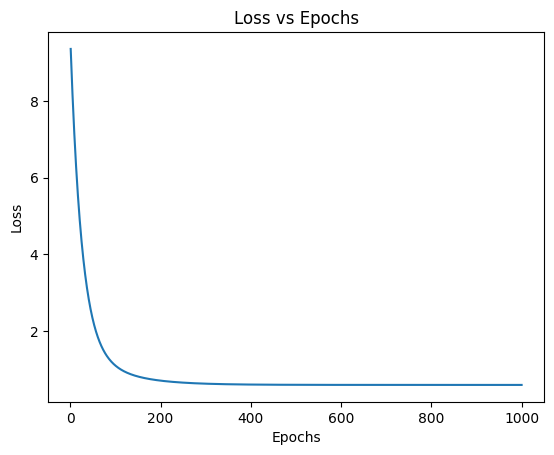

Convergence at epoch: 584, Loss: 0.5967433452606201
Number of iterations: 584


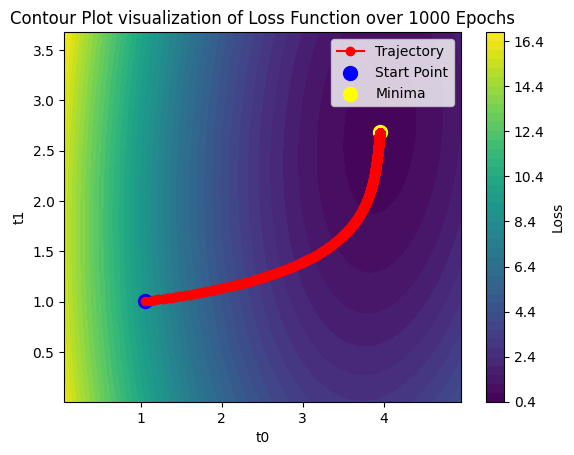

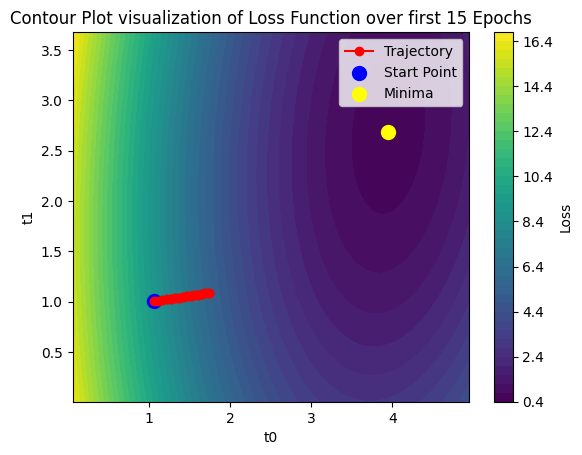

Loss after 15 Epochs: 5.890503883361816


In [7]:
# Initialize Hyperparameters
alpha=0.01

# Initialize parameters
t0=torch.tensor(1.0, requires_grad=True)
t1=torch.tensor(1.0, requires_grad=True)

# Initialize lists to store the values of t0, t1, and loss for contour plotting
t0_values = []
t1_values = []
loss_values = []

# Storing loss values for every 100 epochs for plotting
dict_fb={}

# Full Batch Gradient Descent
for epoch in range(1,1001):
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    loss.backward()
    dict_fb[epoch]=loss.item()
    if(epoch%40==0):
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
    with torch.no_grad():
        t0 -= alpha*t0.grad
        t1 -= alpha*t1.grad

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

    t0.grad.zero_()
    t1.grad.zero_()

print()
# Print the final values of t0 and t1
print(f"Final values of t0:{t0.item()} and t1:{t1.item()}")

# Plotting Loss vs Epochs for Full-batch Gradient Descent
plt.plot(dict_fb.keys(), dict_fb.values())
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

# Convergance
epsheilon=0.001
converge=False
for epoch in dict_fb.keys():
    if (dict_fb[epoch] - min_loss) <= epsheilon:
        converge=True
        print(f"Convergence at epoch: {epoch}, Loss: {dict_fb[epoch]}")
        print(f"Number of iterations: {epoch}")
        break
if not converge:
    print("No Convergence")

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 2500 epochs
plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
plt.scatter(t0_values, t1_values, c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over 1000 Epochs")
plt.legend()

# Mark the starting point and the minima point
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the first 15 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the minima point
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")

##### Mini-batch gradient descent

Epoch: 16, Loss: 1.3493098020553589
Epoch: 32, Loss: 0.7821572422981262
Epoch: 48, Loss: 0.6620087623596191
Epoch: 64, Loss: 0.6204408407211304
Epoch: 80, Loss: 0.6049910187721252
Epoch: 96, Loss: 0.5992106199264526
Epoch: 112, Loss: 0.5970491766929626
Epoch: 128, Loss: 0.5962425470352173
Epoch: 144, Loss: 0.5959421992301941
Epoch: 160, Loss: 0.5958309173583984
Epoch: 176, Loss: 0.5957901477813721
Epoch: 192, Loss: 0.5957754254341125
Epoch: 208, Loss: 0.595770001411438
Epoch: 224, Loss: 0.5957682132720947
Epoch: 240, Loss: 0.5957676768302917
Epoch: 256, Loss: 0.5957674980163574
Epoch: 272, Loss: 0.595767617225647
Epoch: 288, Loss: 0.5957675576210022
Epoch: 304, Loss: 0.595767617225647
Epoch: 320, Loss: 0.5957674384117126
Epoch: 336, Loss: 0.5957675576210022
Epoch: 352, Loss: 0.595767617225647
Epoch: 368, Loss: 0.5957675576210022
Epoch: 384, Loss: 0.595767617225647
Epoch: 400, Loss: 0.5957676768302917

Final values of t0:3.9543795585632324 and t1:2.682593584060669


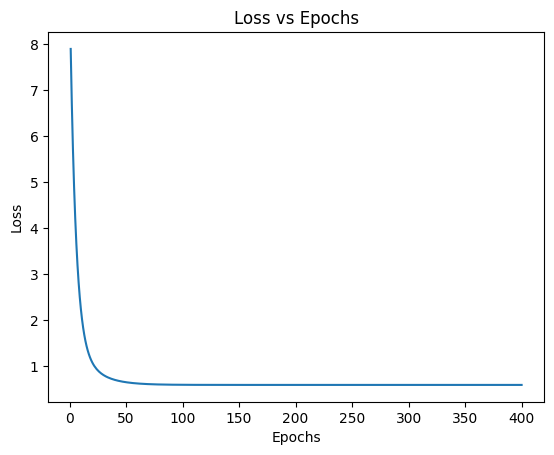

Convergence at epoch: 117, Loss: 0.5967079401016235
Number of iterations: 936


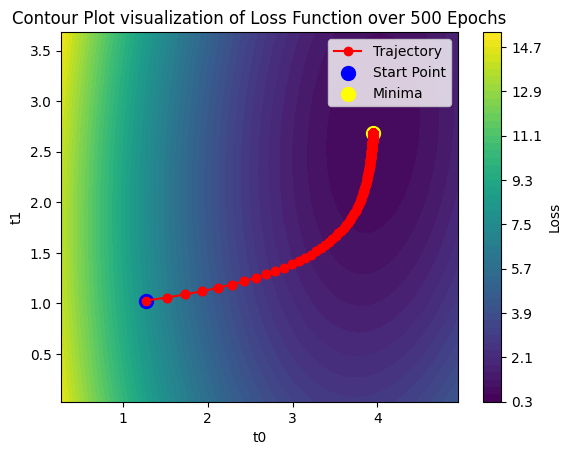

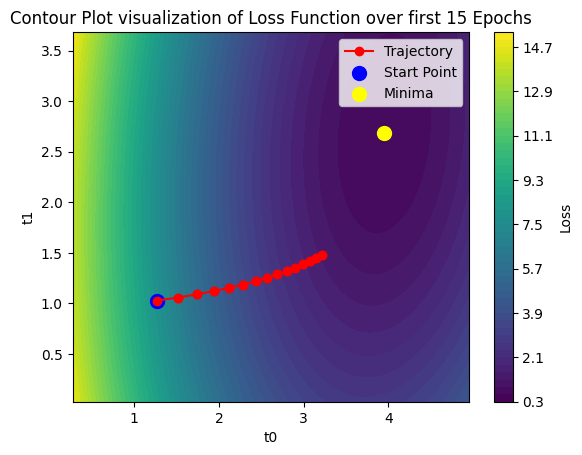

Loss after 15 Epochs: 1.4436627626419067


In [8]:
# Initialize Hyperparameters
batch_size = 8
alpha = 0.01

# Initialize parameters
t0 = torch.tensor(1.0, requires_grad=True)
t1 = torch.tensor(1.0, requires_grad=True)

# Initialize lists to store the values of t0, t1, and loss for contour plotting
t0_values = []
t1_values = []
loss_values = []

# Storing loss values for every 10 epochs for plotting
dict_mb = {}

# Mini-batch gradient descent
for epoch in range(1,401):
    for it in range(0, num_samples, batch_size):
        loss = 0
        for i in range(it, min(it + batch_size, num_samples)):
            yp = t0 + t1 * x1[i]
            loss += (y[i] - yp) ** 2
        loss = loss / batch_size
        loss.backward()
        with torch.no_grad():
            t0 -= alpha * t0.grad
            t1 -= alpha * t1.grad
        t0.grad.zero_()
        t1.grad.zero_()
    # Calculate loss for the entire dataset after each epoch
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    dict_mb[epoch]=loss.item()
    if(epoch%16==0):
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

print()
# Print the final values of t0 and t1
print(f"Final values of t0:{t0.item()} and t1:{t1.item()}")

# Plotting Loss vs Epochs for Mini-batch Gradient Descent
plt.plot(dict_mb.keys(), dict_mb.values(), label='Mini-batch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

# Convergance
epsheilon=0.001
converge=False
for epoch in dict_mb.keys():
    if (dict_mb[epoch] - min_loss) <= epsheilon:
        converge=True
        print(f"Convergence at epoch: {epoch}, Loss: {dict_mb[epoch]}")
        print(f"Number of iterations: {epoch*batch_size}")
        break
if not converge:
    print("No Convergence")

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 500 epochs
plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
plt.scatter(t0_values, t1_values, c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over 500 Epochs")
plt.legend()

# Mark the starting point and the minima point
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the first 15 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the minima point
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")

##### Stochastic gradient descent

Epoch: 2, Loss: 1.3171966075897217
Epoch: 4, Loss: 0.7675114870071411
Epoch: 6, Loss: 0.6556494832038879
Epoch: 8, Loss: 0.6177812814712524
Epoch: 10, Loss: 0.604071855545044
Epoch: 12, Loss: 0.5991533994674683
Epoch: 14, Loss: 0.5974363088607788
Epoch: 16, Loss: 0.5968657732009888
Epoch: 18, Loss: 0.596695065498352
Epoch: 20, Loss: 0.5966565012931824
Epoch: 22, Loss: 0.596657395362854
Epoch: 24, Loss: 0.596666693687439
Epoch: 26, Loss: 0.5966757535934448
Epoch: 28, Loss: 0.5966825485229492
Epoch: 30, Loss: 0.5966871976852417
Epoch: 32, Loss: 0.5966901779174805
Epoch: 34, Loss: 0.5966919660568237
Epoch: 36, Loss: 0.596693217754364
Epoch: 38, Loss: 0.5966939330101013
Epoch: 40, Loss: 0.5966945290565491
Epoch: 42, Loss: 0.5966945886611938
Epoch: 44, Loss: 0.5966947674751282
Epoch: 46, Loss: 0.5966948866844177
Epoch: 48, Loss: 0.5966948866844177
Epoch: 50, Loss: 0.5966948866844177

Final values of t0:3.981717586517334 and t1:2.689053773880005


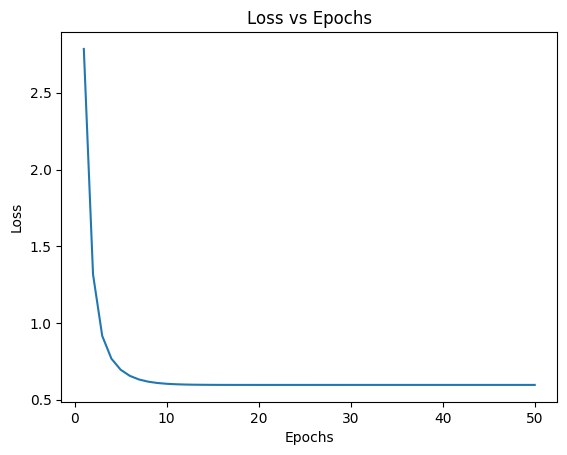

Convergence at epoch: 17, Loss: 0.5967534780502319
Number of iterations: 680


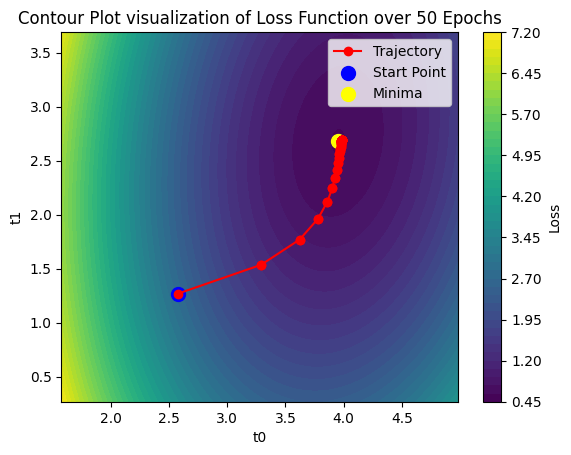

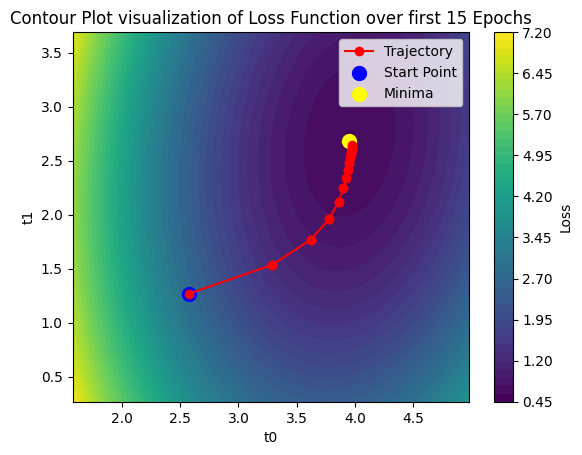

Loss after 15 Epochs: 0.5970714092254639


In [9]:
# Initialize Hyperparameters
alpha = 0.01

# Initialize parameters
t0 = torch.tensor(1.0, requires_grad=True)
t1 = torch.tensor(1.0, requires_grad=True)

# Initialize lists to store the values of t0, t1, and loss for contour plotting
t0_values = []
t1_values = []
loss_values = []

# Storing loss values for every epoch for plotting
dict_s = {}

# Sochastic gradient descent
for epoch in range(1,51):
    for it in range(0, num_samples):
        loss = 0
        yp = t0 + t1 * x1[it]
        loss += (y[it] - yp) ** 2
        loss = loss
        loss.backward()
        with torch.no_grad():
            t0 -= alpha * t0.grad
            t1 -= alpha * t1.grad
        t0.grad.zero_()
        t1.grad.zero_()
    # Calculate loss for the entire dataset after each epoch
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    dict_s[epoch]=loss.item()
    if(epoch%2==0):
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

print()
# Print the final values of t0 and t1
print(f"Final values of t0:{t0.item()} and t1:{t1.item()}")

# Plotting Loss vs Epochs for Sochastic Gradient Descent
plt.plot(dict_s.keys(), dict_s.values(), label='Mini-batch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

# Convergance
epsheilon=0.001
converge=False
for epoch in dict_s.keys():
    if (dict_s[epoch] - min_loss) <= epsheilon:
        converge=True
        print(f"Convergence at epoch: {epoch}, Loss: {dict_s[epoch]}")
        print(f"Number of iterations: {epoch*num_samples}")
        break
if not converge:
    print("No Convergence")

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 50 epochs
plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
plt.scatter(t0_values, t1_values, c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over 50 Epochs")
plt.legend()

# Mark the starting point and the minima point
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the first 15 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the minima point
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")

##### From above we can clearly observe that stochastic gradient is the fastest requires only 17 epochs to converge to the ϵ neighborhood of the min-loss. Followed by mini-batch gradient descent requiring 117 epochs and full-batch gradient descent taking 584 epochs. This is because the number of iterations in 1 epoch of stochastic gradient descent is sample_size while it is sample_size/batch_size in mini-batch gradient descent and 1 in full-batch gradient descent. Hence, stochastic gradient descent is the fastest.

#### Q4 Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an ϵ-neighborhood for both dataset. Choose ϵ=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

##### Full-batch gradient descent with momentum implementation

Intial values of t0: 1.0 and t1: 1.0


,Loss,t0,t1,t0_grad,t1_grad,velocity_t0,velocity_t1
Epoch,,,,,,,
1,9.355593,1.056164,1.005630,-5.616434,-0.562998,-0.056164,-0.005630
2,9.040088,1.144914,1.014698,-5.505059,-0.568954,-0.088749,-0.009068
3,8.554128,1.251454,1.025921,-5.329098,-0.578259,-0.106540,-0.011223
4,7.991062,1.366557,1.038547,-5.117918,-0.589215,-0.115103,-0.012626
5,7.407585,1.484518,1.052130,-4.889848,-0.600736,-0.117961,-0.013583
...,...,...,...,...,...,...,...
246,0.596335,3.945508,2.639857,-0.003231,-0.026450,-0.000083,-0.000677
247,0.596317,3.945589,2.640524,-0.003180,-0.026037,-0.000081,-0.000667
248,0.596300,3.945669,2.641181,-0.003130,-0.025629,-0.000080,-0.000656


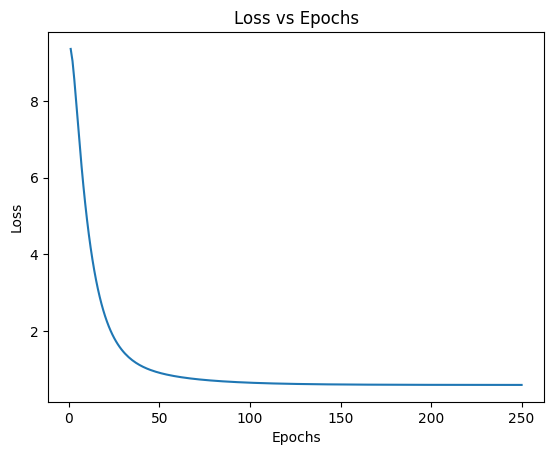

Convergence at epoch: 229, Loss: 0.5967475771903992


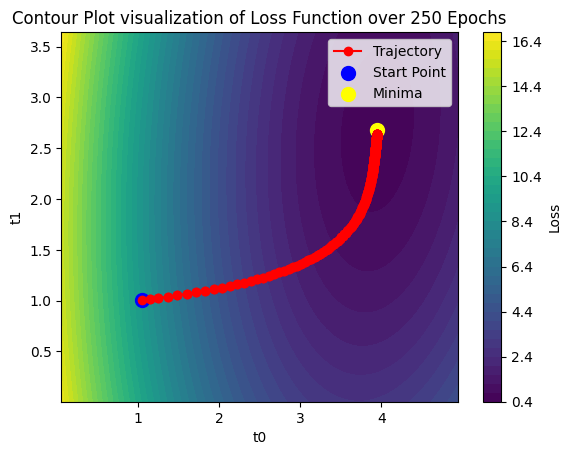

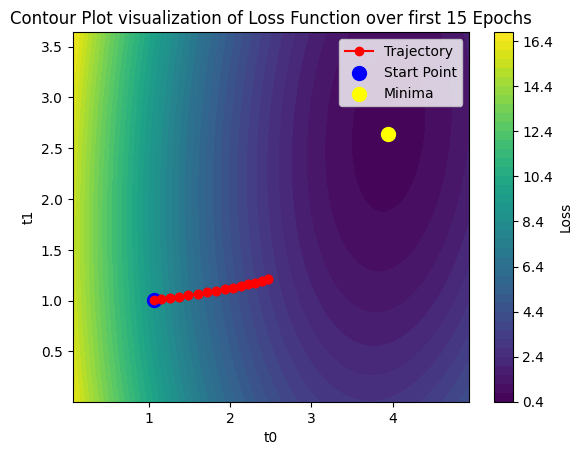

Loss after 15 Epochs: 3.3308944702148438


In [37]:
# Initialize hyperparameters
alpha = 0.01  # Learning rate
momentum = 0.6  # Momentum factor

# Initialize the parameters
t0 = torch.tensor(1.0, requires_grad=True)
t1 = torch.tensor(1.0, requires_grad=True)

# Initialize velocities for momentum
change_t0 = 0.0
change_t1 = 0.0

t0_values = []
t1_values = []
loss_values = []
t0_grad = []
t1_grad = []
velocity_t0 = []
velocity_t1 = []

dict_fb = {}

print(f"Intial values of t0: {t0.item()} and t1: {t1.item()}")

for epoch in range(1, 251):
    loss = 0
    for i in range(num_samples):
        yp = t0 + t1 * x1[i]
        loss += (y[i] - yp) ** 2
    loss = loss / num_samples
    loss.backward()
    
    
    dict_fb[epoch] = loss.item()
    
    # Update parameters using gradient descent with momentum
    with torch.no_grad():
        change_t0 = momentum * change_t0 + alpha * t0.grad
        change_t1 = momentum * change_t1 + alpha * t1.grad
        
        t0 -= change_t0
        t1 -= change_t1

        t0_grad.append(t0.grad.item())
        t1_grad.append(t1.grad.item())
    
    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())
    
    # Zero gradients for the next iteration
    t0.grad.zero_()
    t1.grad.zero_()

    velocity_t0.append(change_t0.item())
    velocity_t1.append(change_t1.item())

df=pd.DataFrame(dict_fb.items(), columns=['Epoch', 'Loss'])
df.set_index('Epoch', inplace=True)
df['t0'] = t0_values
df['t1'] = t1_values
df['t0_grad'] = t0_grad
df['t1_grad'] = t1_grad
df['velocity_t0'] = velocity_t0
df['velocity_t1'] = velocity_t1
display(df)

# Plot Loss vs Epochs
plt.plot(dict_fb.keys(), dict_fb.values())
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

# Convergance
epsheilon=0.001
converge=False
for epoch in dict_fb.keys():
    if (dict_fb[epoch] - min_loss) <= epsheilon:
        converge=True
        print(f"Convergence at epoch: {epoch}, Loss: {dict_fb[epoch]}")
        break
if not converge:
    print("No Convergence")

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 250 epochs
plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
plt.scatter(t0_values, t1_values, c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over 250 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

# Plotting the contour map for first 15 epochs
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the first 15 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(t0_values[-1], t1_values[-1], c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")


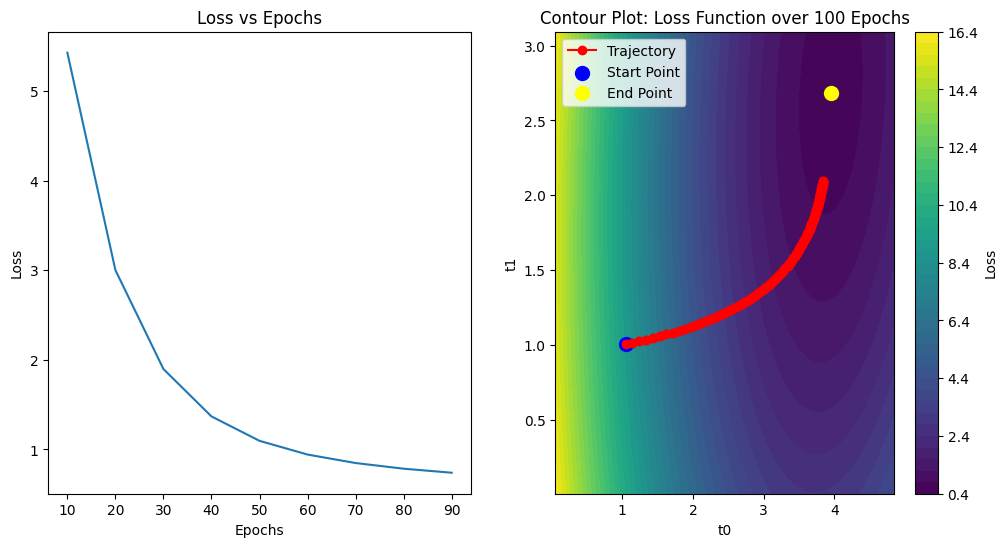

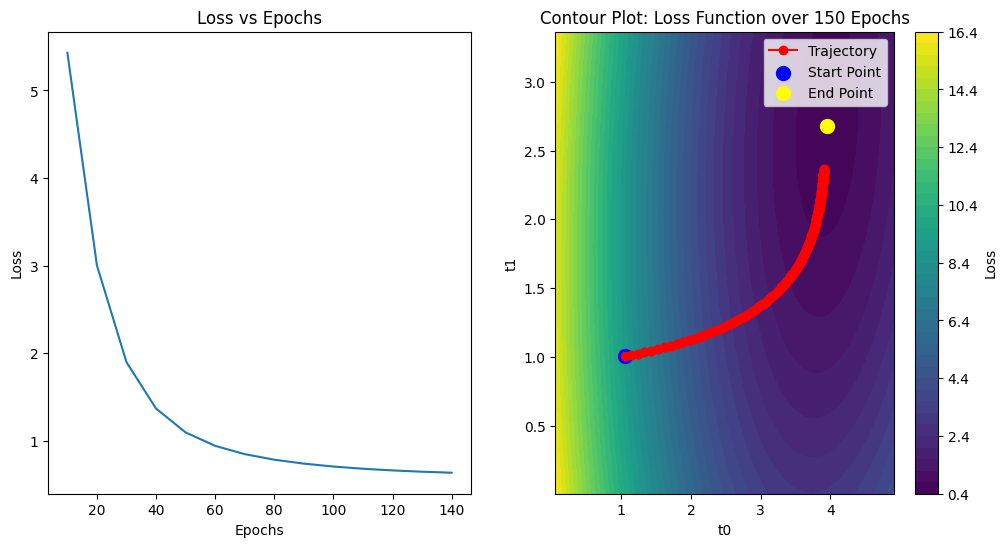

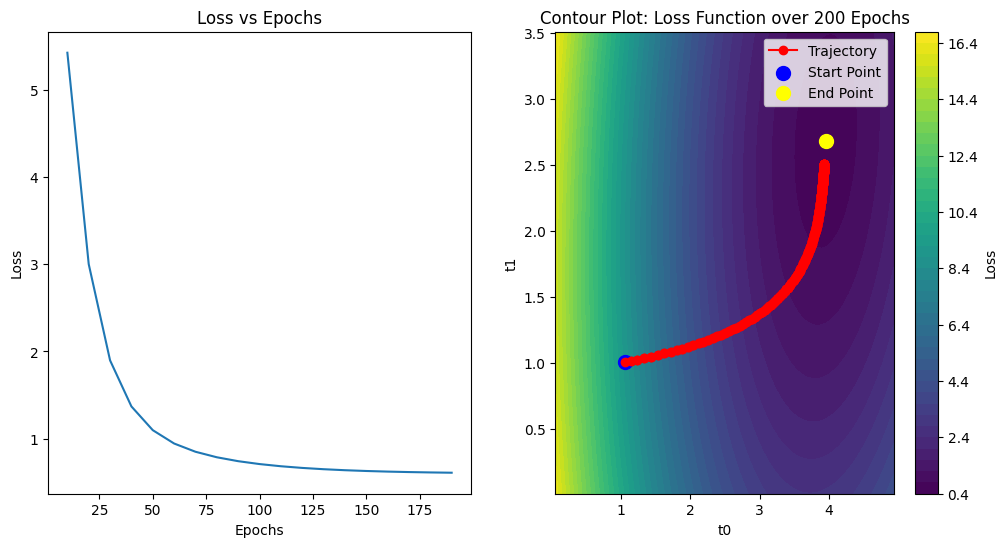

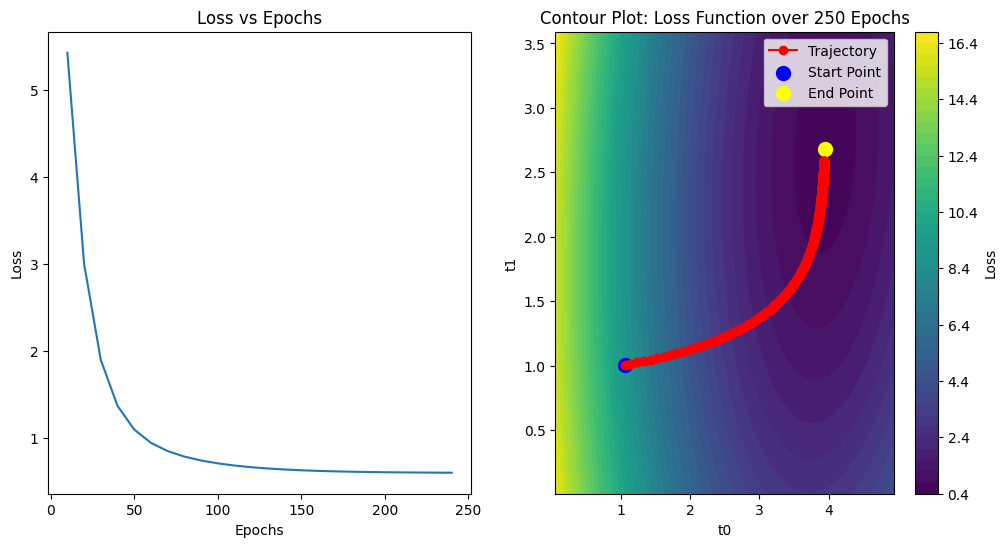

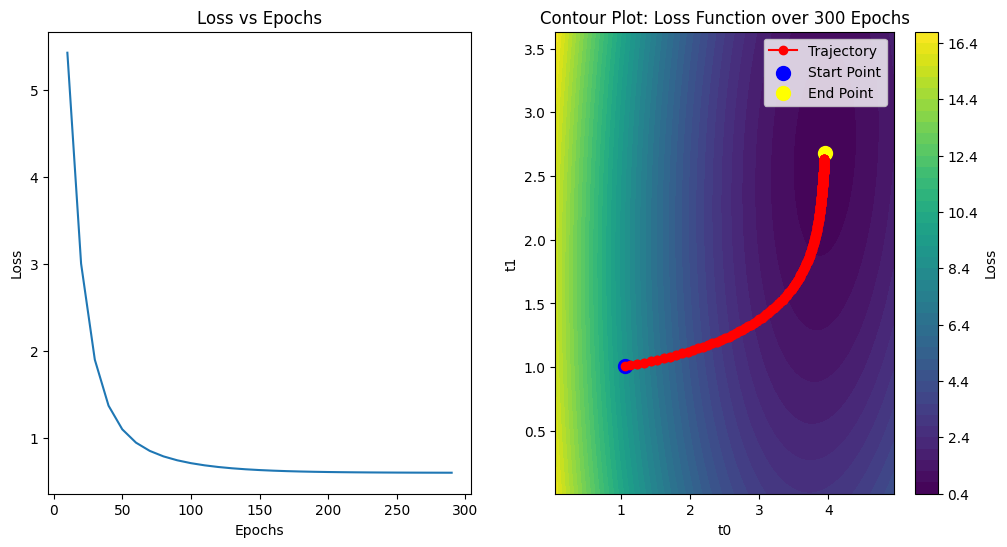

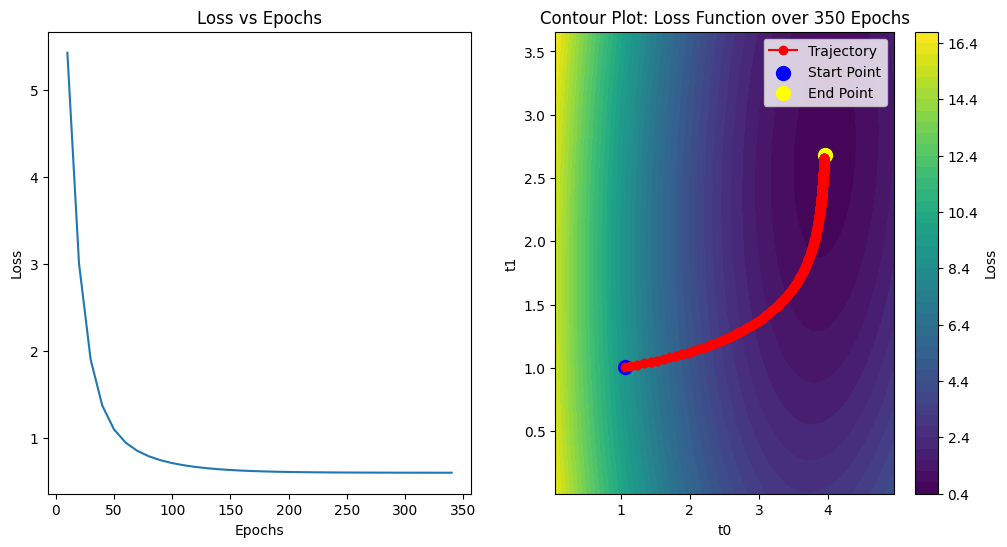

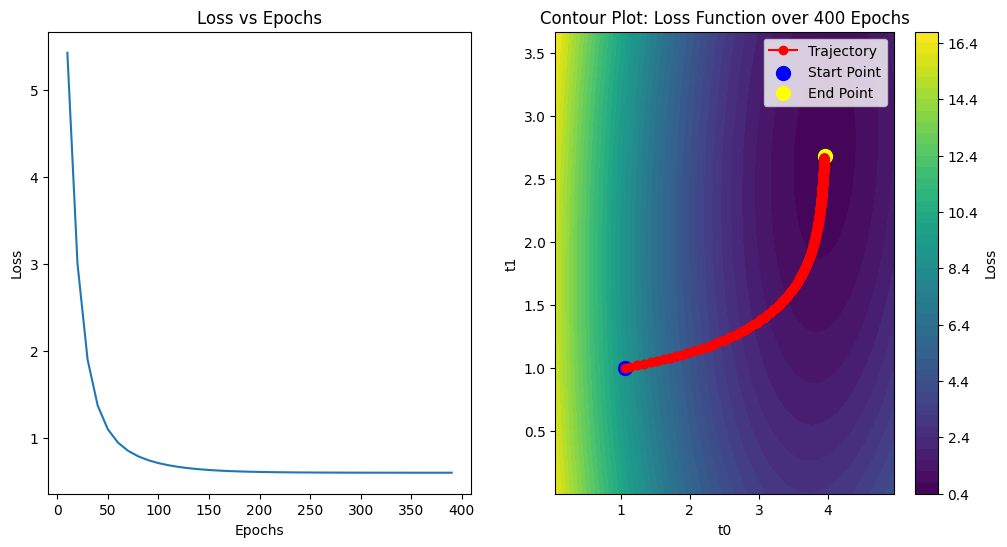

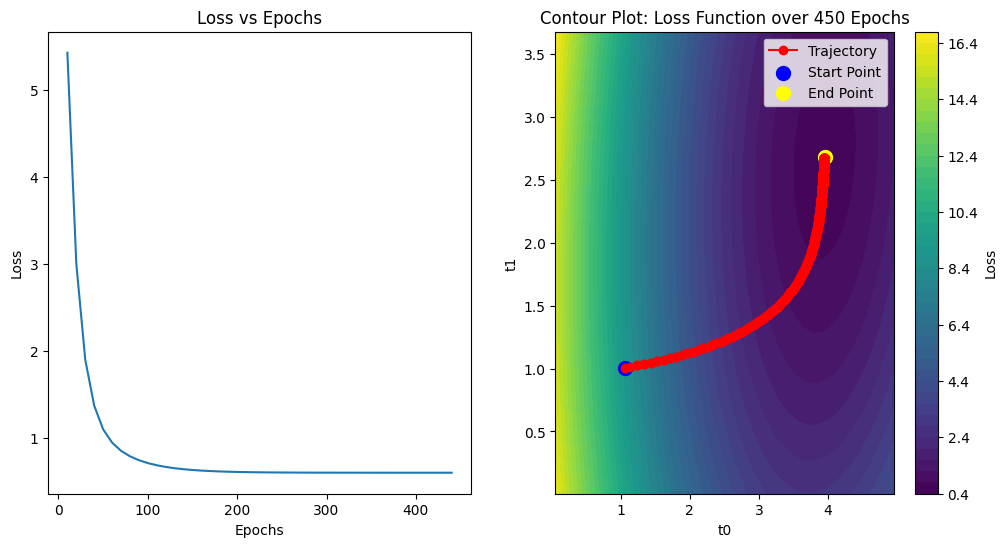

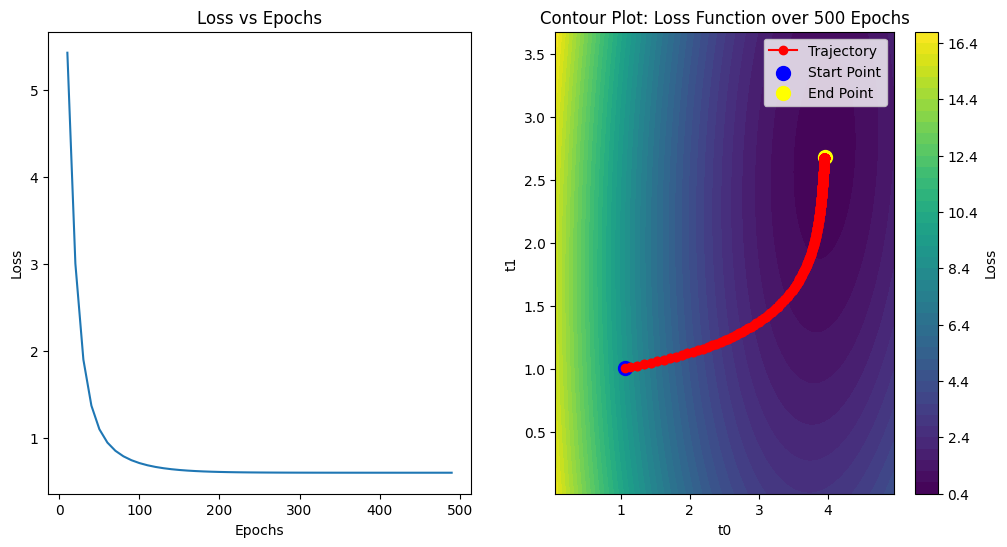

In [20]:
for te in range(100,501, 50):

    # Initialize hyperparameters
    alpha = 0.01  # Learning rate
    momentum = 0.5  # Momentum factor
   

    # Initialize the parameters
    t0 = torch.tensor(1.0, requires_grad=True)
    t1 = torch.tensor(1.0, requires_grad=True)

    # Initialize velocities for momentum
    change_t0 = 0.0
    change_t1 = 0.0

    t0_values = []
    t1_values = []
    loss_values = []

    dict_fb = {}

    for epoch in range(1, te):
        loss = 0
        for i in range(num_samples):
            yp = t0 + t1 * x1[i]
            loss += (y[i] - yp) ** 2
        loss = loss / num_samples
        loss.backward()
        
        if(epoch%10==0):
            dict_fb[epoch] = loss.item()
        
        # Update parameters using gradient descent with momentum
        with torch.no_grad():
            change_t0 = momentum * change_t0 + alpha * t0.grad
            change_t1 = momentum * change_t1 + alpha * t1.grad
            
            t0 -= change_t0
            t1 -= change_t1
        
        # Store t0, t1, and loss for contour plotting
        t0_values.append(t0.item())
        t1_values.append(t1.item())
        loss_values.append(loss.item())
        
        # Zero gradients for the next iteration
        t0.grad.zero_()
        t1.grad.zero_()

    # Plot Loss vs Epochs
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(dict_fb.keys(), dict_fb.values())
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")

    # Generate a grid of t0 and t1 values
    t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
    t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
    T0, T1 = np.meshgrid(t0_grid, t1_grid)

    # Calculate the loss function at each point of the grid
    loss_grid = np.zeros_like(T0)
    for i in range(len(t0_grid)):
        for j in range(len(t1_grid)):
            loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

    # Plotting the contour map
    plt.subplot(1, 2, 2)
    plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(label='Loss')

    # Plot the trajectory of t0 and t1 during the 250 epochs
    plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
    plt.scatter(t0_values, t1_values, c='red')
    plt.xlabel("t0")
    plt.ylabel("t1")
    plt.title(f"Contour Plot: Loss Function over {te} Epochs")

    # Mark the starting point and the ending point (minimized point)
    plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
    plt.scatter(min_t0, min_t1, c='yellow', s=100, label='End Point')  # Minima

    plt.legend()
    plt.show()

##### Sochastic gradient descent with momentum implementation

,epoch,t0,t1,t0_grad,t1_grad,velocity_t0,velocity_t1
iteration,,,,,,,
1,0,1.080500,1.078731,-8.050039,-7.873124,-0.080500,-0.078731
2,0,1.168943,1.091033,-8.441727,-0.836486,-0.088442,-0.012301
3,0,1.209504,1.075851,-3.613909,1.579659,-0.040561,0.015182
4,0,1.260376,1.033799,-4.884380,4.129357,-0.050872,0.042053
5,0,1.302263,1.027326,-3.934358,0.436954,-0.041887,0.006472
...,...,...,...,...,...,...,...
1996,49,3.950140,2.708854,0.660863,-0.330391,0.005965,-0.003730
1997,49,3.936921,2.710133,1.292046,-0.109209,0.013219,-0.001279
1998,49,3.944470,2.711140,-0.820969,-0.094301,-0.007549,-0.001007


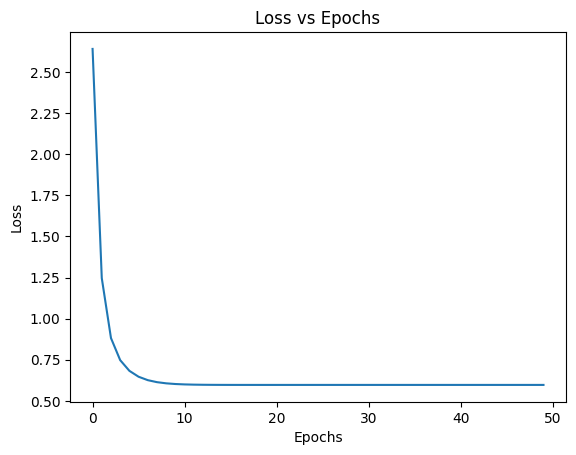

Convergence at epoch: 17, Loss: 0.5967413187026978


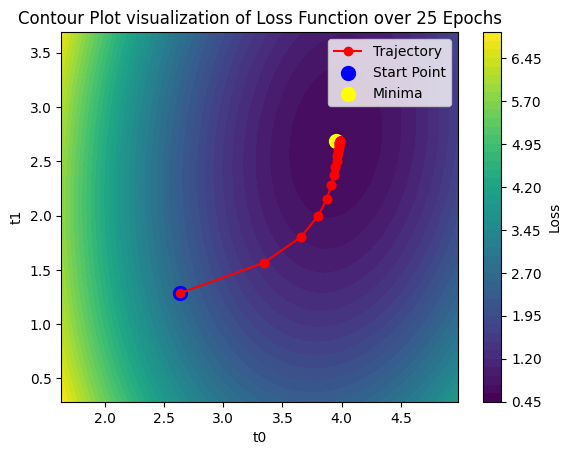

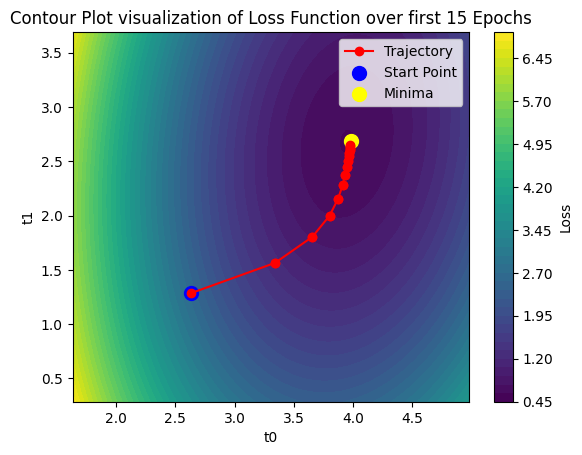

Loss after 15 Epochs: 0.5969589948654175


In [51]:
# Initialize hyperparameters
alpha = 0.01  # Learning rate
momentum = 0.05  # Momentum factor

# Initialize the parameters
t0 = torch.tensor(1.0, requires_grad=True)
t1 = torch.tensor(1.0, requires_grad=True)

# Initialize velocities for momentum
change_t0 = 0.0
change_t1 = 0.0

t0_values = []
t1_values = []

epoch_values=[]
dt0_values = []
dt1_values = []
loss_values = []
t0_grad = []
t1_grad = []
velocity_t0 = []
velocity_t1 = []

dict_s = {}

for epoch in range(0, 50):
    for it in range(0, num_samples):
        yp = t0 + t1 * x1[it]
        loss = (y[it] - yp) ** 2
        loss.backward()
        with torch.no_grad():
            change_t0 = momentum * change_t0 + alpha * t0.grad
            change_t1 = momentum * change_t1 + alpha * t1.grad

            t0 -= change_t0
            t1 -= change_t1

            t0_grad.append(t0.grad.item())
            t1_grad.append(t1.grad.item())

            # Zero gradients for the next iteration
            t0.grad.zero_()
            t1.grad.zero_()

            velocity_t0.append(change_t0.item())
            velocity_t1.append(change_t1.item())

            dt0_values.append(t0.item())
            dt1_values.append(t1.item())

            if(it<num_samples-1):
                epoch_values.append(epoch)
            else:
                epoch_values.append(epoch+1)

    # Calculate loss for the entire dataset after each epoch
    loss=0
    for i in range(num_samples):
        yp= t0 + t1*x1[i]
        loss += (y[i]-yp)**2
    loss=loss/num_samples
    dict_s[epoch]=loss.item()

    # Store t0, t1, and loss for contour plotting
    t0_values.append(t0.item())
    t1_values.append(t1.item())
    loss_values.append(loss.item())

df=pd.DataFrame()
df['iteration'] = range(1, len(dt0_values) + 1)
df['epoch'] = epoch_values
df['t0'] = dt0_values
df['t1'] = dt1_values
df['t0_grad'] = t0_grad
df['t1_grad'] = t1_grad
df['velocity_t0'] = velocity_t0
df['velocity_t1'] = velocity_t1
df.set_index('iteration', inplace=True)
display(df)

# Plot Loss vs Epochs
plt.plot(dict_s.keys(), dict_s.values())
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.show()

# Convergence
epsheilon = 0.001
converge=False
for epoch in dict_s.keys():
    if (dict_s[epoch] - min_loss) <= epsheilon:
        converge=True
        print(f"Convergence at epoch: {epoch}, Loss: {dict_s[epoch]}")
        break
if not converge:
    print("No Convergence")

# Generate a grid of t0 and t1 values
t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
T0, T1 = np.meshgrid(t0_grid, t1_grid)

# Calculate the loss function at each point of the grid
loss_grid = np.zeros_like(T0)
for i in range(len(t0_grid)):
    for j in range(len(t1_grid)):
        loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

# Plotting the contour map
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the 25 epochs
plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
plt.scatter(t0_values, t1_values, c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over 25 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(min_t0, min_t1, c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

# Plotting the contour map for first 15 epochs
plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Plot the trajectory of t0 and t1 during the first 15 epochs
plt.plot(t0_values[0:15], t1_values[0:15], marker='o', color='red', label='Trajectory')
plt.scatter(t0_values[0:15], t1_values[0:15], c='red')
plt.xlabel("t0")
plt.ylabel("t1")
plt.title("Contour Plot visualization of Loss Function over first 15 Epochs")
plt.legend()

# Mark the starting point and the ending point (minimized point)
plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
plt.scatter(t0_values[-1], t1_values[-1], c='yellow', s=100, label='Minima')  # Minima

plt.legend()
plt.show()

print(f"Loss after 15 Epochs: {loss_values[14]}")


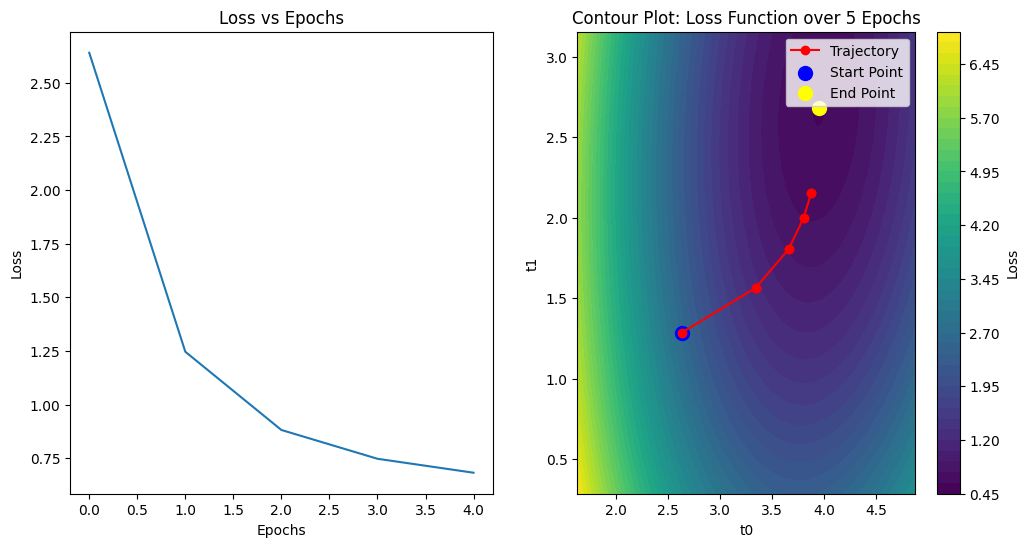

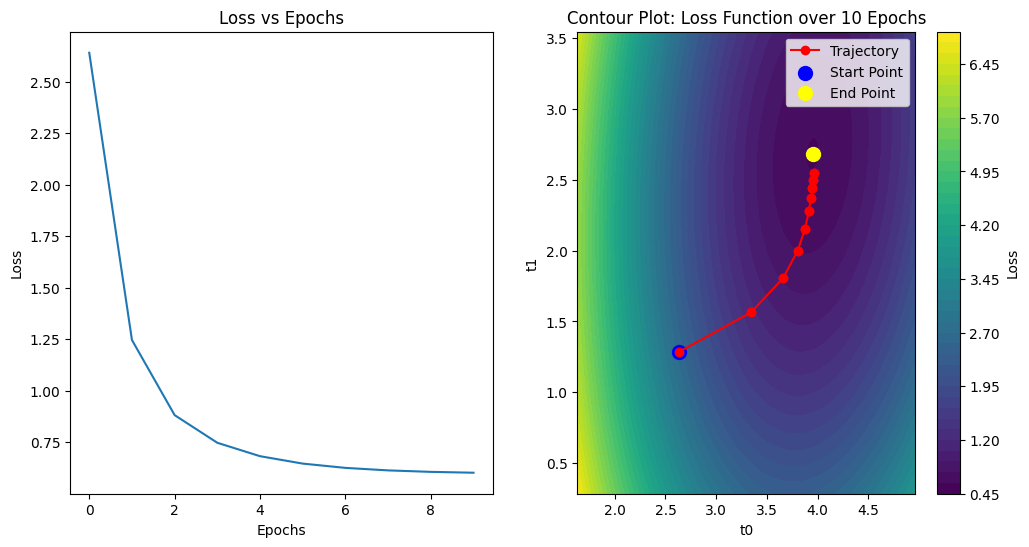

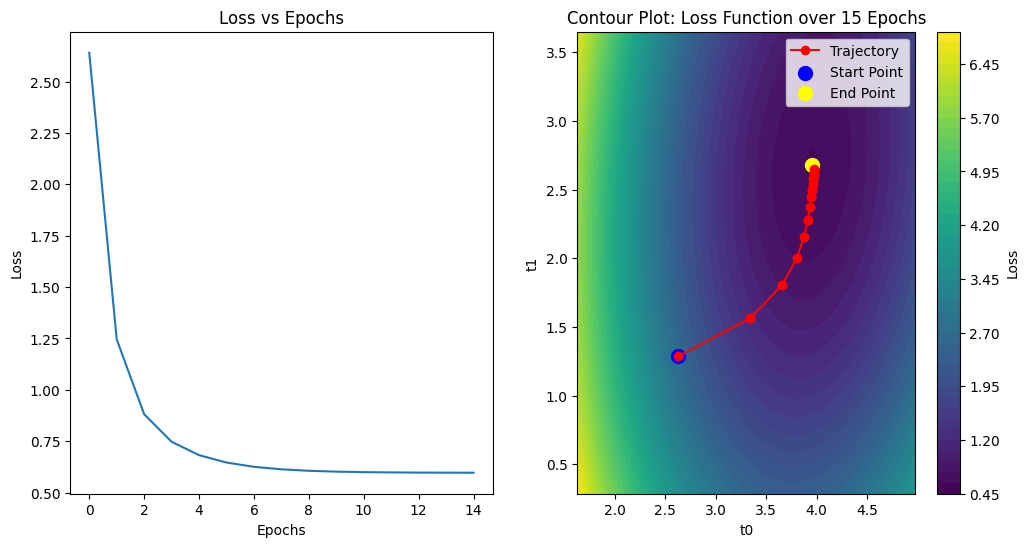

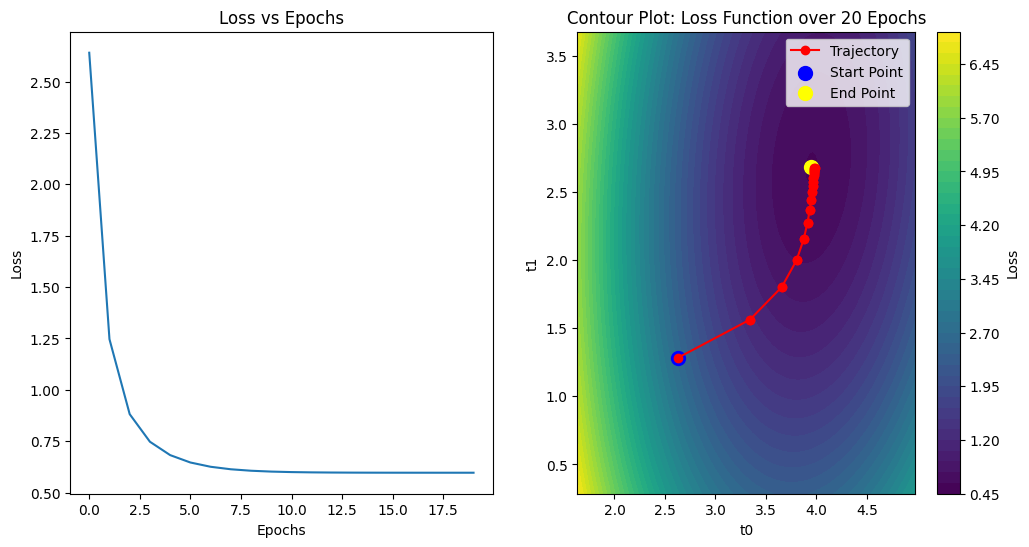

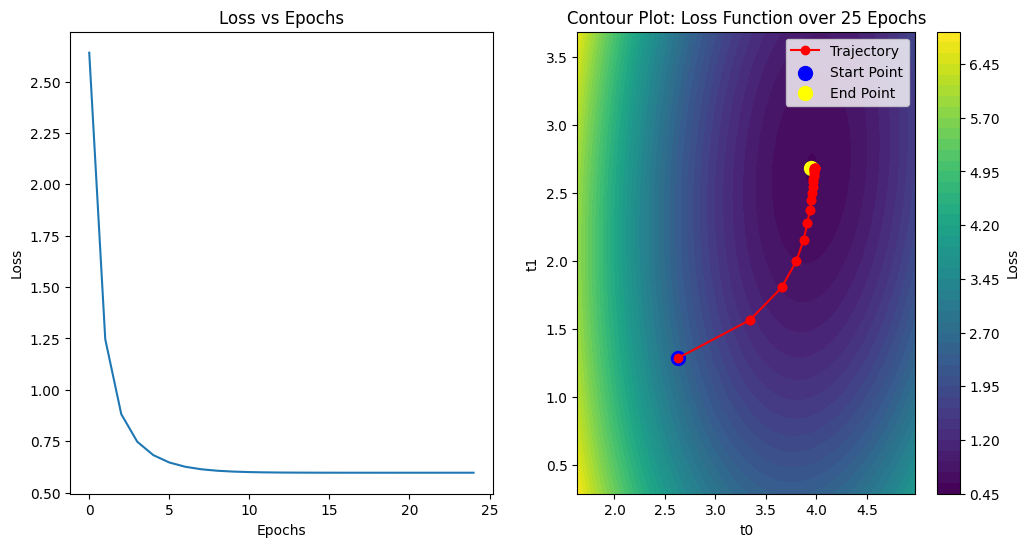

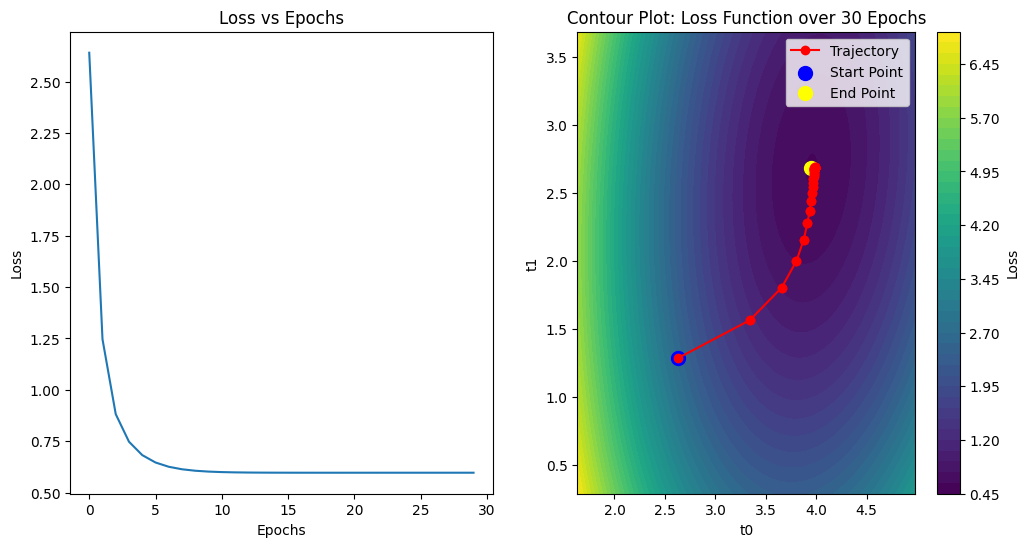

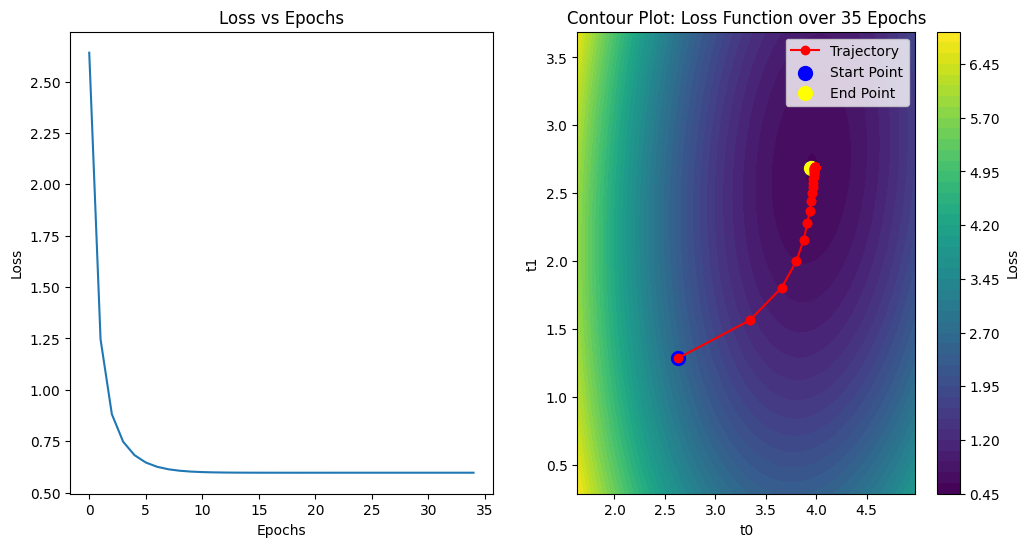

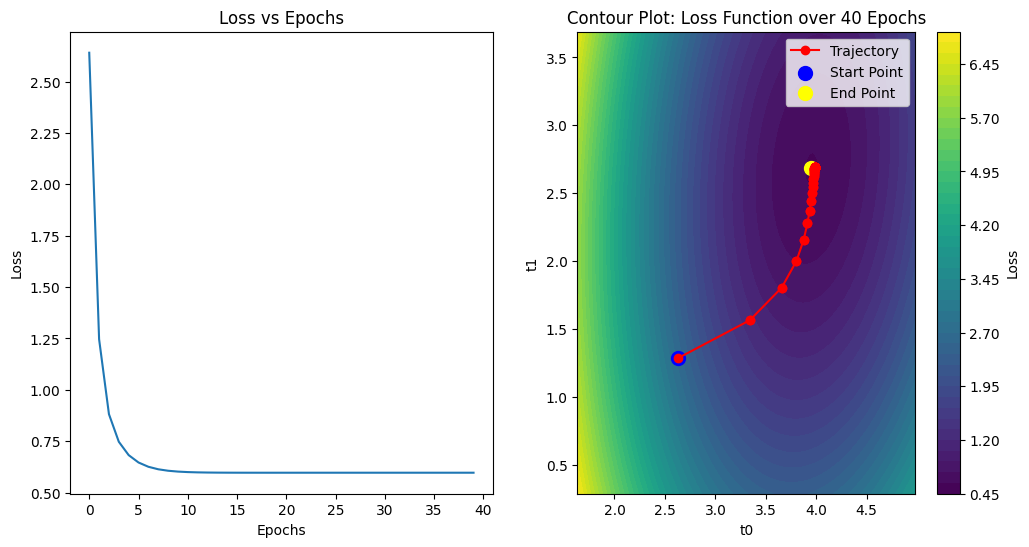

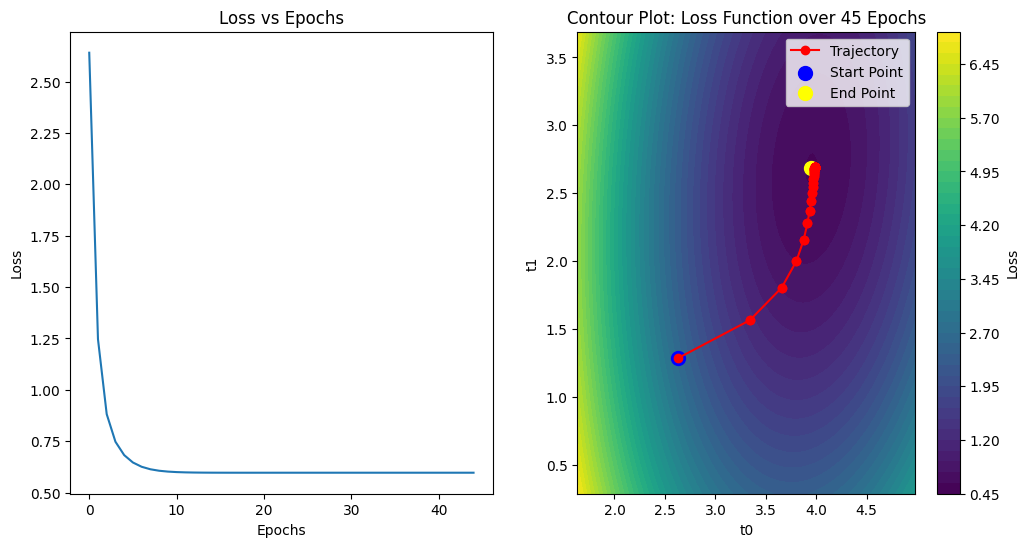

In [58]:
for te in range(5,50, 5):
    # Initialize hyperparameters
    alpha = 0.01  # Learning rate
    momentum = 0.05  # Momentum factor
   

    # Initialize the parameters
    t0 = torch.tensor(1.0, requires_grad=True)
    t1 = torch.tensor(1.0, requires_grad=True)

    # Initialize velocities for momentum
    change_t0 = 0.0
    change_t1 = 0.0

    t0_values = []
    t1_values = []
    loss_values = []

    dict_s = {}

    for epoch in range(0, te):
        for it in range(0, num_samples):
            yp = t0 + t1 * x1[it]
            loss = (y[it] - yp) ** 2
            loss.backward()
            with torch.no_grad():
                change_t0 = momentum * change_t0 + alpha * t0.grad
                change_t1 = momentum * change_t1 + alpha * t1.grad

                t0 -= change_t0
                t1 -= change_t1

                # Zero gradients for the next iteration
                t0.grad.zero_()
                t1.grad.zero_()
        # Calculate loss for the entire dataset after each epoch
        loss=0
        for i in range(num_samples):
            yp= t0 + t1*x1[i]
            loss += (y[i]-yp)**2
        loss=loss/num_samples
        dict_s[epoch]=loss.item()
        # Store t0, t1, and loss for contour plotting
        t0_values.append(t0.item())
        t1_values.append(t1.item())
        loss_values.append(loss.item())
        
        # Zero gradients for the next iteration
        t0.grad.zero_()
        t1.grad.zero_()

    # Plot Loss vs Epochs
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(dict_s.keys(), dict_s.values())
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")

    # Generate a grid of t0 and t1 values
    t0_grid = np.linspace(min(t0_values) - 1, max(t0_values) + 1, 100)
    t1_grid = np.linspace(min(t1_values) - 1, max(t1_values) + 1, 100)
    T0, T1 = np.meshgrid(t0_grid, t1_grid)

    # Calculate the loss function at each point of the grid
    loss_grid = np.zeros_like(T0)
    for i in range(len(t0_grid)):
        for j in range(len(t1_grid)):
            loss_grid[i, j] = np.mean((y - (T0[i, j] + T1[i, j] * x1)) ** 2)

    # Plotting the contour map
    plt.subplot(1, 2, 2)
    plt.contourf(T0, T1, loss_grid, levels=50, cmap='viridis')
    plt.colorbar(label='Loss')

    # Plot the trajectory of t0 and t1 during the 250 epochs
    plt.plot(t0_values, t1_values, marker='o', color='red', label='Trajectory')
    plt.scatter(t0_values, t1_values, c='red')
    plt.xlabel("t0")
    plt.ylabel("t1")
    plt.title(f"Contour Plot: Loss Function over {te} Epochs")

    # Mark the starting point and the ending point (minimized point)
    plt.scatter(t0_values[0], t1_values[0], c='blue', s=100, label='Start Point')  # Start
    plt.scatter(min_t0, min_t1, c='yellow', s=100, label='End Point')  # Minima

    plt.legend()
    plt.show()

##### 